In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("/kaggle/input"))

# Any results you write to the current directory are saved as output.

['suicide-rates-overview-1985-to-2016']


# Data loading

In [2]:
#dataset read operation
#read_csv function is required to read the data.
data=pd.read_csv('/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv')

# Data Info

In [3]:
#show data first 5 rows
data.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Generation  
4                 796          Boomers

In [4]:
#show data last 5 rows
data.tail()

country  year     sex          age  suicides_no  population  \
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male   5-14 years           60     2762158   
27818  Uzbekistan  2014  female   5-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop    country-year  HDI for year  gdp_for_year ($)   \
27815               2.96  Uzbekistan2014         0.675     63,067,077,179   
27816               2.58  Uzbekistan2014         0.675     63,067,077,179   
27817               2.17  Uzbekistan2014         0.675     63,067,077,179   
27818               1.67  Uzbekistan2014         0.675     63,067,077,179   
27819               1.46  Uzbekistan2014         0.675     63,067,077,179   

       gdp_per_capita ($)    generation  
27815                2309  Generation X  
27816                2309        Silent  
27817                2309  Generation Z  
27818                2309  Generation Z  
27819                2309       Boomers

In [5]:
#random rows in dataset
data.sample(5)

country  year     sex          age  suicides_no  population  \
24461    Sweden  1994  female  15-24 years           19      537800   
9275     France  2000  female  15-24 years          137     3764091   
8604    Estonia  2015  female   5-14 years            1       67802   
13046     Italy  2006  female  55-74 years          274     6982799   
19421  Portugal  1990    male  15-24 years           62      821204   

       suicides/100k pop  country-year  HDI for year  gdp_for_year ($)   \
24461               3.53    Sweden1994           NaN    226,079,963,712   
9275                3.64    France2000         0.848  1,362,248,940,483   
8604                1.47   Estonia2015           NaN     22,566,956,982   
13046               3.92     Italy2006           NaN  1,942,633,797,516   
19421               7.55  Portugal1990         0.710     78,721,607,509   

       gdp_per_capita ($)    generation  
24461               27658  Generation X  
9275                24648  Generation X  
8604                18149  Generation Z  
13046               34578        Silent  
19421                8356  Generation X

In [6]:
data.sample(frac=0.1)

country  year     sex          age  suicides_no  population  \
15216    Lithuania  2009    male  15-24 years          109      237032   
10100       Greece  1991  female  55-74 years           26     1112085   
12292      Ireland  2004  female  15-24 years            8      315174   
9453       Georgia  1990  female  35-54 years           22      682450   
1114       Armenia  2002  female  15-24 years            1      294739   
...            ...   ...     ...          ...          ...         ...   
19863  Puerto Rico  2000    male  25-34 years           43      258901   
17396  Netherlands  2012    male  15-24 years           97     1041845   
9413        France  2012    male  25-34 years          688     3856840   
15153    Lithuania  2004    male  55-74 years          271      272871   
1778     Australia  2015    male  15-24 years          281     1608990   

       suicides/100k pop     country-year  HDI for year  gdp_for_year ($)   \
15216              45.99    Lithuania2009           NaN     37,440,673,478   
10100               2.34       Greece1991           NaN    105,143,232,380   
12292               2.54      Ireland2004           NaN    193,870,350,137   
9453                3.22      Georgia1990           NaN      7,753,501,868   
1114                0.34      Armenia2002           NaN      2,376,335,048   
...                  ...              ...           ...                ...   
19863              16.61  Puerto Rico2000           NaN     61,701,800,000   
17396               9.31  Netherlands2012         0.920    828,946,812,397   
9413               17.84       France2012         0.886  2,683,825,225,093   
15153              99.31    Lithuania2004           NaN     22,649,930,576   
1778               17.46    Australia2015           NaN  1,349,034,029,453   

       gdp_per_capita ($)    generation  
15216               12412    Millenials  
10100               10816        Silent  
12292               51662    Millenials  
9453                 1555        Silent  
1114                  788    Millenials  
...                   ...           ...  
19863               17569  Generation X  
17396               52334    Millenials  
9413                45002    Millenials  
15153                7028        Silent  
1778                60656    Millenials  

[2782 rows x 12 columns]

In [7]:
#Describe function includes analysis of all our numerical data. For this, count, mean, std, min,% 25,% 50,% 75, max values are given.
data.describe()

year   suicides_no    population  suicides/100k pop  \
count  27820.000000  27820.000000  2.782000e+04       27820.000000   
mean    2001.258375    242.574407  1.844794e+06          12.816097   
std        8.469055    902.047917  3.911779e+06          18.961511   
min     1985.000000      0.000000  2.780000e+02           0.000000   
25%     1995.000000      3.000000  9.749850e+04           0.920000   
50%     2002.000000     25.000000  4.301500e+05           5.990000   
75%     2008.000000    131.000000  1.486143e+06          16.620000   
max     2016.000000  22338.000000  4.380521e+07         224.970000   

       HDI for year  gdp_per_capita ($)  
count   8364.000000        27820.000000  
mean       0.776601        16866.464414  
std        0.093367        18887.576472  
min        0.483000          251.000000  
25%        0.713000         3447.000000  
50%        0.779000         9372.000000  
75%        0.855000        24874.000000  
max        0.944000       126352.000000

In [8]:
data.iloc[:,1:5].describe()

year   suicides_no
count  27820.000000  27820.000000
mean    2001.258375    242.574407
std        8.469055    902.047917
min     1985.000000      0.000000
25%     1995.000000      3.000000
50%     2002.000000     25.000000
75%     2008.000000    131.000000
max     2016.000000  22338.000000

In [9]:
#The info function shows the data types and numerical values of the features in our data set.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [10]:
#We will now set the headings of the feature values in the data set.
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [11]:
#so,change the names of the column. Because there may be problems for future analysis.
data=data.rename(columns={'country':'Country','year':'Year','sex':'Gender','age':'Age','suicides_no':'SuicidesNo','population':'Population','suicides/100k pop':'Suicides100kPop','country-year':'CountryYear','HDI for year':'HDIForYear',' gdp_for_year ($) ':'GdpForYearMoney','gdp_per_capita ($)':'GdpPerCapitalMoney','generation':'Generation'})

In [12]:
data.columns

Index(['Country', 'Year', 'Gender', 'Age', 'SuicidesNo', 'Population',
       'Suicides100kPop', 'CountryYear', 'HDIForYear', 'GdpForYearMoney',
       'GdpPerCapitalMoney', 'Generation'],
      dtype='object')

In [13]:
#And, how many rows and columns are there for all data?
print('Data Shape :')
data.shape

Data Shape :


(27820, 12)

In [14]:
data.isnull().any()

Country               False
Year                  False
Gender                False
Age                   False
SuicidesNo            False
Population            False
Suicides100kPop       False
CountryYear           False
HDIForYear             True
GdpForYearMoney       False
GdpPerCapitalMoney    False
Generation            False
dtype: bool

In [15]:
data.isnull().values.any()

True

In [16]:
#Now,I will check null on all data and If data has null, I will sum of null data's. In this way, how many missing data is in the data.
data.isnull().sum()

Country                   0
Year                      0
Gender                    0
Age                       0
SuicidesNo                0
Population                0
Suicides100kPop           0
CountryYear               0
HDIForYear            19456
GdpForYearMoney           0
GdpPerCapitalMoney        0
Generation                0
dtype: int64

# Data manipulation

In [17]:
#As you can see, most of the HDIForYear value is empty. That's why I want this value deleted.
data=data.drop(['HDIForYear','CountryYear'],axis=1)

# One-hot Encoding

In [18]:
from sklearn.preprocessing import OneHotEncoder

# create the one hot encoder
onehot_encoder = OneHotEncoder(sparse=False)

# reshape the gender data to be 2D
data_gender = data['Gender'].values.reshape(-1, 1)

# perform one hot encoding
onehot_encoded = onehot_encoder.fit_transform(data_gender)


Min Year : 1985
Max Year : 2016


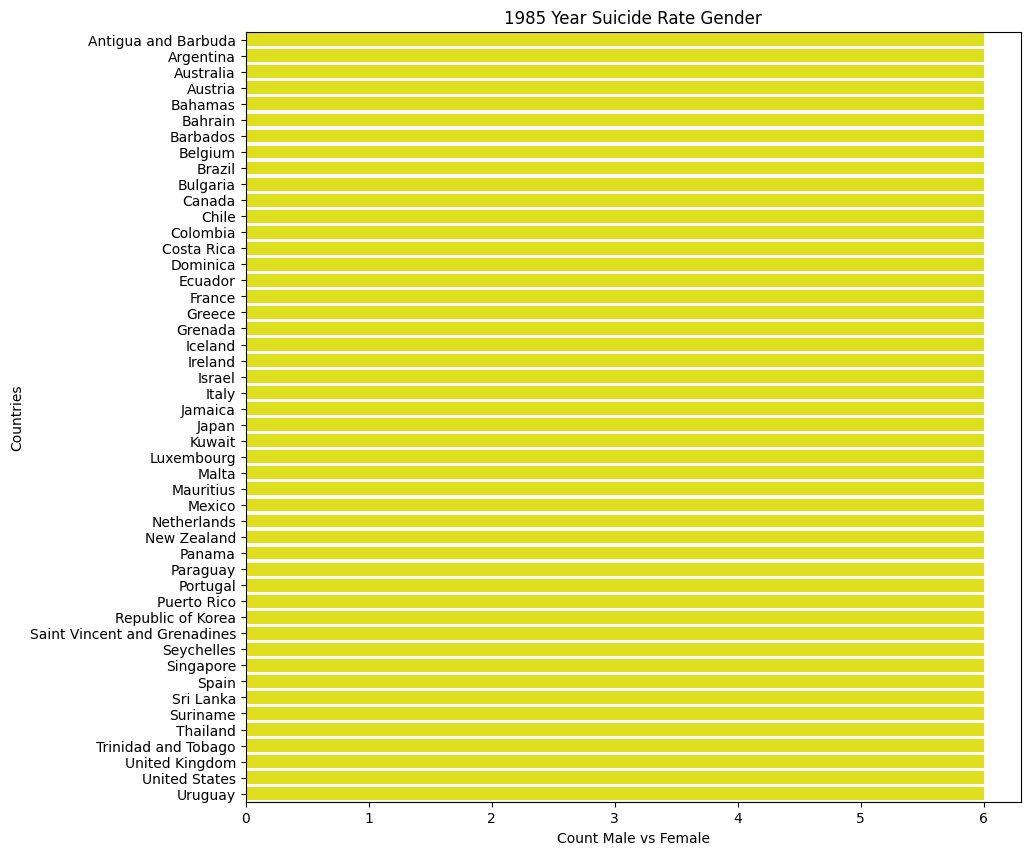

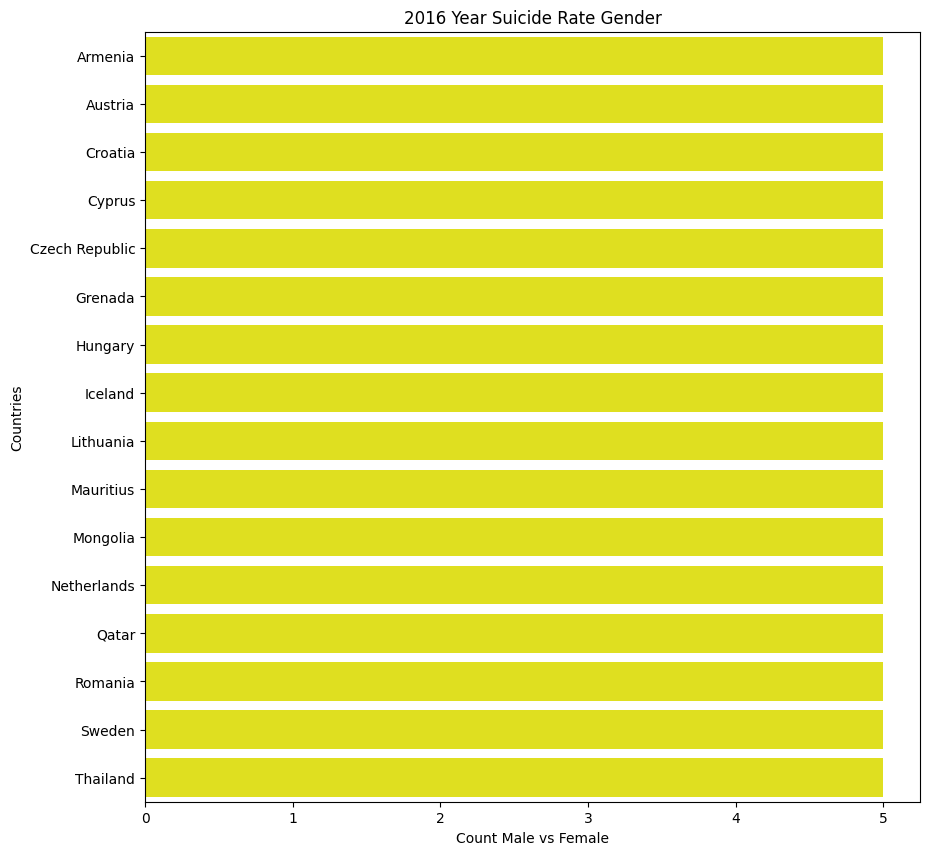

In [19]:
#Now start analysis, min year and max year will find them
min_year=min(data.Year)
max_year=max(data.Year)
print('Min Year :',min_year)
print('Max Year :',max_year)

#1985 min year,2016 max year.

data_country=data[(data['Year']==min_year)]

country_1985=data[(data['Year']==min_year)].Country.unique()
country_1985_male=[]
country_1985_female=[]

for country in country_1985:
    country_1985_male.append(len(data_country[(data_country['Country']==country)&(data_country['Gender']=='male')]))
    country_1985_female.append(len(data_country[(data_country['Country']==country)&(data_country['Gender']=='female')])) 
    
#We found the ratio of men and women who committed suicide in some countries in 1985 and we are now charting.

plt.figure(figsize=(10,10))
sns.barplot(y=country_1985,x=country_1985_male,color='red')
sns.barplot(y=country_1985,x=country_1985_female,color='yellow')
plt.ylabel('Countries')
plt.xlabel('Count Male vs Female')
plt.title('1985 Year Suicide Rate Gender')
plt.show()

#Very odd all the rates came on an equal level. So let's do max year.

data_country=data[(data['Year']==max_year)]

country_2016=data[(data['Year']==max_year)].Country.unique()
country_2016_male=[]
country_2016_female=[]

for country in country_2016:
    country_2016_male.append(len(data_country[(data_country['Country']==country)&(data_country['Gender']=='male')]))
    country_2016_female.append(len(data_country[(data_country['Country']==country)&(data_country['Gender']=='female')])) 
    
#We found the ratio of men and women who committed suicide in some countries in 1985 and we are now charting.

plt.figure(figsize=(10,10))
sns.barplot(y=country_2016,x=country_2016_male,color='red')
sns.barplot(y=country_2016,x=country_2016_female,color='yellow')
plt.ylabel('Countries')
plt.xlabel('Count Male vs Female')
plt.title('2016 Year Suicide Rate Gender')
plt.show()

<p>While the suicide rate was widespread in more countries in 1985, this ratio has fallen considerably in 2016. Now let us examine the other features of these countries.</p>

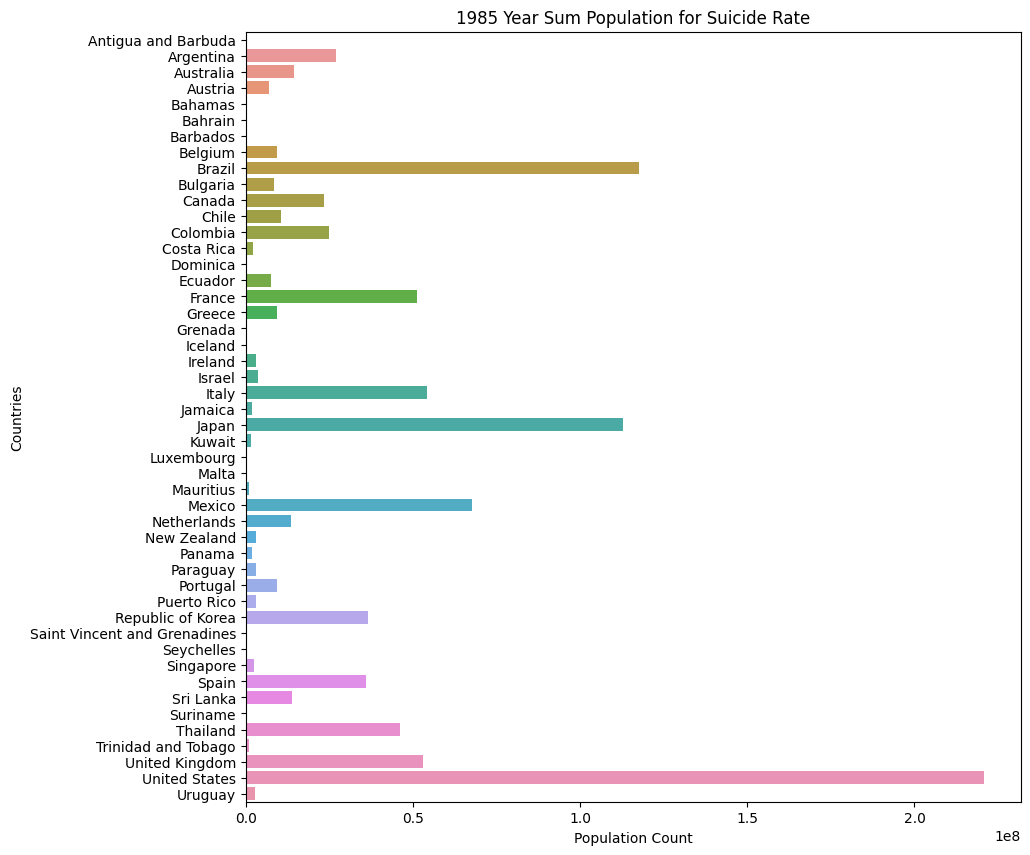

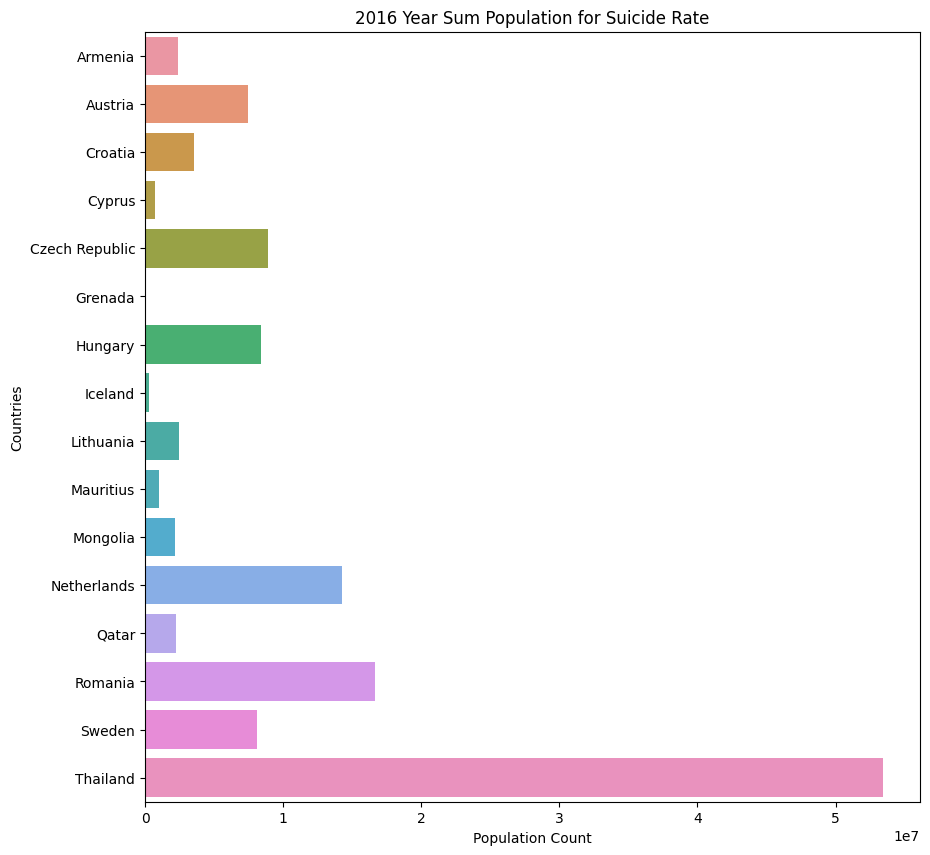

In [20]:
data_country=data[(data['Year']==min_year)]

country_1985_population=[]

for country in country_1985:
    country_1985_population.append(sum(data_country[(data_country['Country']==country)].Population))    

#Now year 1985 find sum population every country

plt.figure(figsize=(10,10))
sns.barplot(y=country_1985,x=country_1985_population)
plt.xlabel('Population Count')
plt.ylabel('Countries')
plt.title('1985 Year Sum Population for Suicide Rate')
plt.show()

#######################################################

data_country=data[(data['Year']==max_year)]

country_2016_population=[]

for country in country_2016:
    country_2016_population.append(sum(data_country[(data_country['Country']==country)].Population))    

#Now year 1985 find sum population every country

plt.figure(figsize=(10,10))
sns.barplot(y=country_2016,x=country_2016_population)
plt.xlabel('Population Count')
plt.ylabel('Countries')
plt.title('2016 Year Sum Population for Suicide Rate')
plt.show()


<p>The values we found on the upper side give the total population we found in 1985 in 2016.</p>

In [21]:
suicideGender1985=data_country.groupby(['Country','Gender']).SuicidesNo.sum()

In [22]:
suicideGender1985

Country         Gender
Armenia         female      14
                male        53
Austria         female     295
                male       906
Croatia         female     168
                male       515
Cyprus          female       5
                male        31
Czech Republic  female     258
                male      1060
Grenada         female       0
                male         0
Hungary         female     446
                male      1315
Iceland         female       4
                male        36
Lithuania       female     129
                male       693
Mauritius       female      15
                male        83
Mongolia        female      52
                male       371
Netherlands     female     613
                male      1273
Qatar           female       5
                male        63
Romania         female     310
                male      1643
Sweden          female     348
                male       782
Thailand        female     842
                

In [23]:
data_country=data[(data['Year']==min_year)]

data_age_5_14=[]
data_age_15_24=[]
data_age_25_34=[]
data_age_35_54=[]
data_age_55_74=[]
data_age_75=[]

for country in country_1985:
        data_age_5_14.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='5-14 years')]))
        data_age_15_24.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='15-24 years')]))
        data_age_25_34.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='25-34 years')]))
        data_age_35_54.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='35-54 years')]))
        data_age_55_74.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='55-74 years')]))
        data_age_75.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='75+ years')]))
        

#######################################################

data_country=data[(data['Year']==max_year)]

data_age_5_14=[]
data_age_15_24=[]
data_age_25_34=[]
data_age_35_54=[]
data_age_55_74=[]
data_age_75=[]

for country in country_2016:
        data_age_5_14.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='5-14 years')]))
        data_age_15_24.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='15-24 years')]))
        data_age_25_34.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='25-34 years')]))
        data_age_35_54.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='35-54 years')]))
        data_age_55_74.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='55-74 years')]))
        data_age_75.append(len(data_country[(data_country['Country']==country)&(data_country['Age']=='75+ years')]))
        
#there is an equal rate. We need to make the query process a little more complicated.

In [24]:
data.head()

Country  Year  Gender          Age  SuicidesNo  Population  \
0  Albania  1987    male  15-24 years          21      312900   
1  Albania  1987    male  35-54 years          16      308000   
2  Albania  1987  female  15-24 years          14      289700   
3  Albania  1987    male    75+ years           1       21800   
4  Albania  1987    male  25-34 years           9      274300   

   Suicides100kPop GdpForYearMoney  GdpPerCapitalMoney       Generation  
0             6.71   2,156,624,900                 796     Generation X  
1             5.19   2,156,624,900                 796           Silent  
2             4.83   2,156,624,900                 796     Generation X  
3             4.59   2,156,624,900                 796  G.I. Generation  
4             3.28   2,156,624,900                 796          Boomers

In [25]:
data['GdpPerCapitalMoney'].unique()

array([ 796,  769,  833, ..., 1964, 2150, 2309])

In [26]:
print("Max : ",max(data['GdpPerCapitalMoney'].unique()))
print('Min : ',min(data['GdpPerCapitalMoney'].unique()))

Max :  126352
Min :  251


In [27]:
print('GdpPerCapitalMoney' in data.columns)
print((data['GdpPerCapitalMoney'] == 251).any())


True
True


In [28]:
data.groupby('Age')['Gender'].count()

Age
15-24 years    4642
25-34 years    4642
35-54 years    4642
5-14 years     4610
55-74 years    4642
75+ years      4642
Name: Gender, dtype: int64

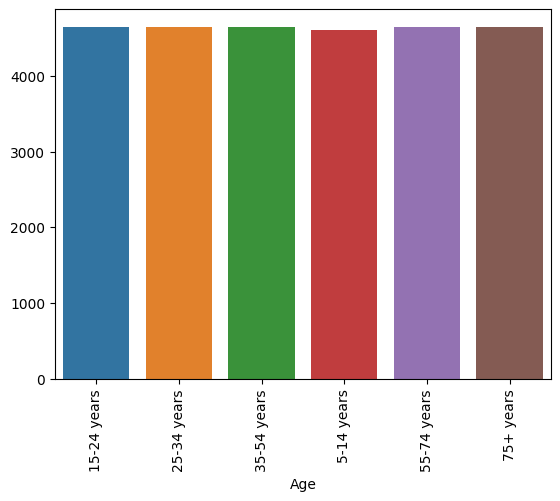

In [29]:
sns.barplot(x=data.groupby('Age')['Gender'].count().index,y=data.groupby('Age')['Gender'].count().values)
plt.xticks(rotation=90)
plt.show()

In [30]:
suicidesNo=[]
for country in data.Country.unique():
    suicidesNo.append(sum(data[data['Country']==country].SuicidesNo))   

In [31]:
suicidesNo=pd.DataFrame(suicidesNo,columns=['suicidesNo'])
country=pd.DataFrame(data.Country.unique(),columns=['country'])
data_suicide_countr=pd.concat([suicidesNo,country],axis=1)
#sns.barplot(x=data.Country.unique(),y=suicidesNo) 
#plt.show()

In [32]:
data_suicide_countr=data_suicide_countr.sort_values(by='suicidesNo',ascending=False)

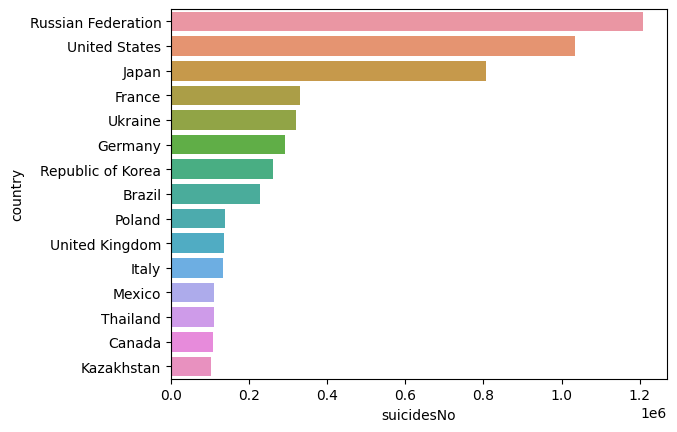

In [33]:
sns.barplot(y=data_suicide_countr.country[:15],x=data_suicide_countr.suicidesNo[:15])
plt.show()

In [34]:
grouop_data=data.groupby(['Age','Gender'])['SuicidesNo'].sum().unstack()
grouop_data=grouop_data.reset_index().melt(id_vars='Age')

In [35]:
grouop_data_female=grouop_data.iloc[:6,:]
grouop_data_male=grouop_data.iloc[6:,:]

In [36]:
grouop_data_female

Age  Gender   value
0  15-24 years  female  175437
1  25-34 years  female  208823
2  35-54 years  female  506233
3   5-14 years  female   16997
4  55-74 years  female  430036
5    75+ years  female  221984

In [37]:
grouop_data_male

Age Gender    value
6   15-24 years   male   633105
7   25-34 years   male   915089
8   35-54 years   male  1945908
9    5-14 years   male    35267
10  55-74 years   male  1228407
11    75+ years   male   431134

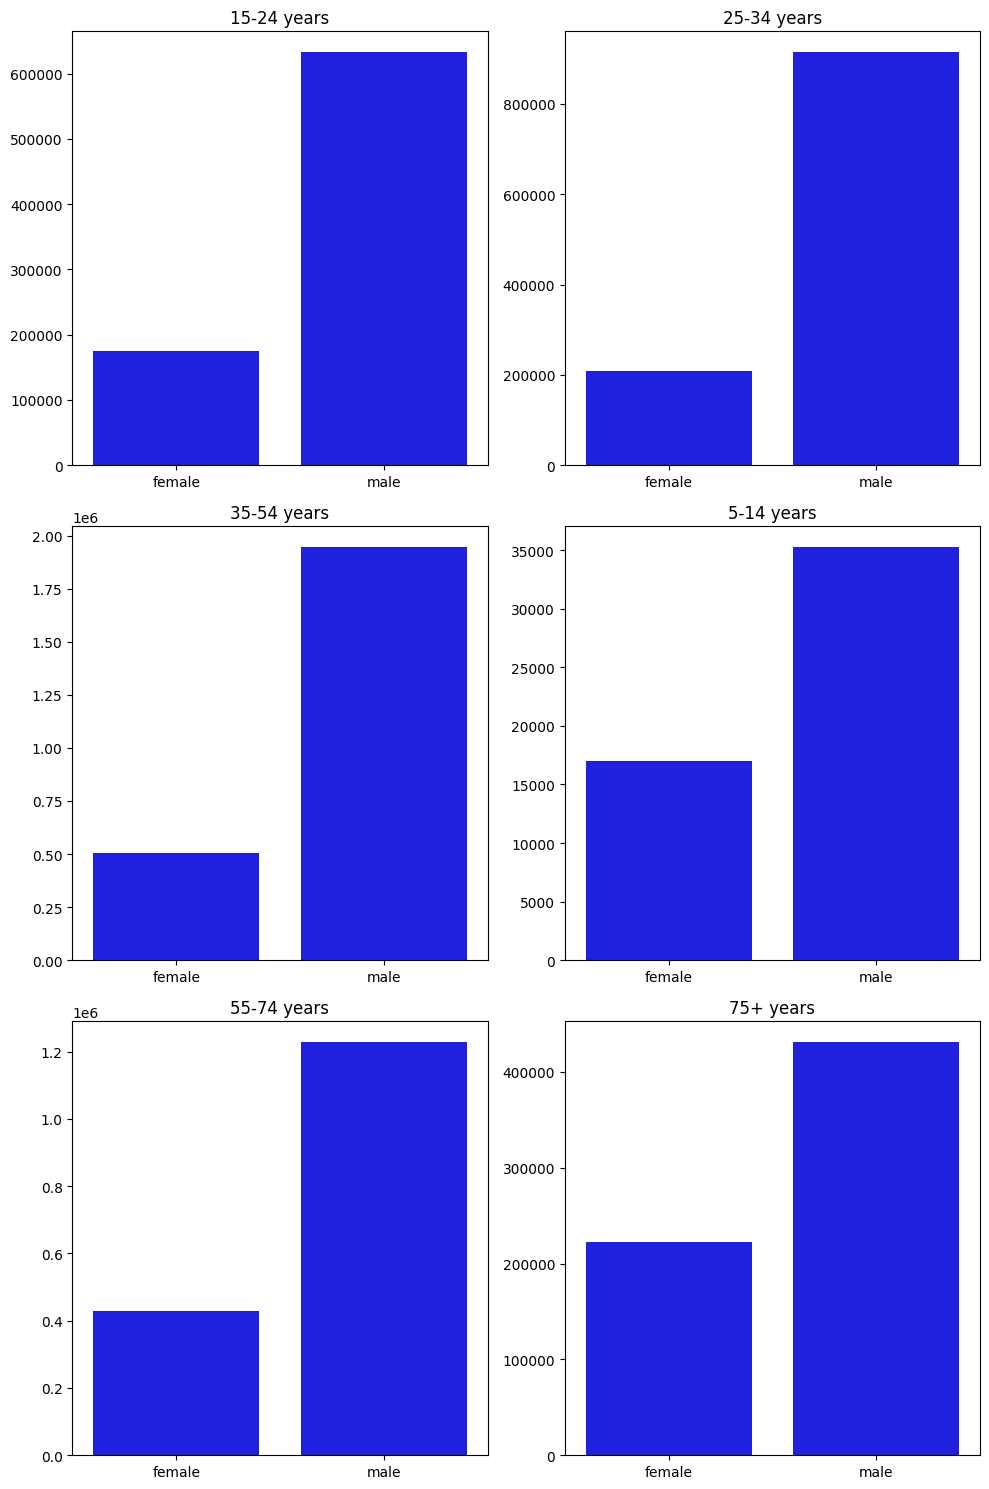

In [38]:
female_=[175437,208823,506233,16997,430036,221984]
male_=[633105,915089,1945908,35267,1228407,431134]
plot_id = 0
for i,age in enumerate(['15-24 years','25-34 years','35-54 years','5-14 years','55-74 years','75+ years']):
    plot_id += 1
    plt.subplot(3,2,plot_id)
    plt.title(age)
    fig, ax = plt.gcf(), plt.gca()
    sns.barplot(x=['female','male'],y=[female_[i],male_[i]],color='blue')
    plt.tight_layout()
    fig.set_size_inches(10, 15)
plt.show()  

<p>All data were analyzed. Graphical analysis was performed for all age rates for suicide rates.</p>

In [39]:
data['Age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

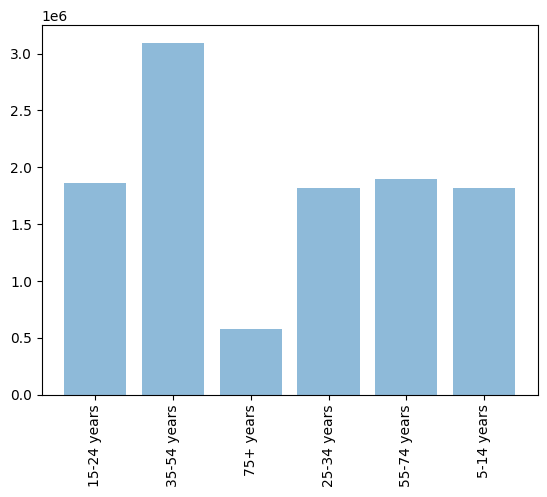

In [40]:
index_population=[]
for age in data['Age'].unique():
    index_population.append(sum(data[data['Age']==age].Population)/len(data[data['Age']==age].Population))
    
plt.bar(['15-24 years','35-54 years','75+ years','25-34 years','55-74 years','5-14 years'],index_population,align='center',alpha=0.5)
plt.xticks(rotation=90)
plt.show()

In [41]:
index_population

[1861901.5286514433,
 3096916.8726841877,
 573735.728780698,
 1817773.284575614,
 1896433.7225333909,
 1821842.3507592191]

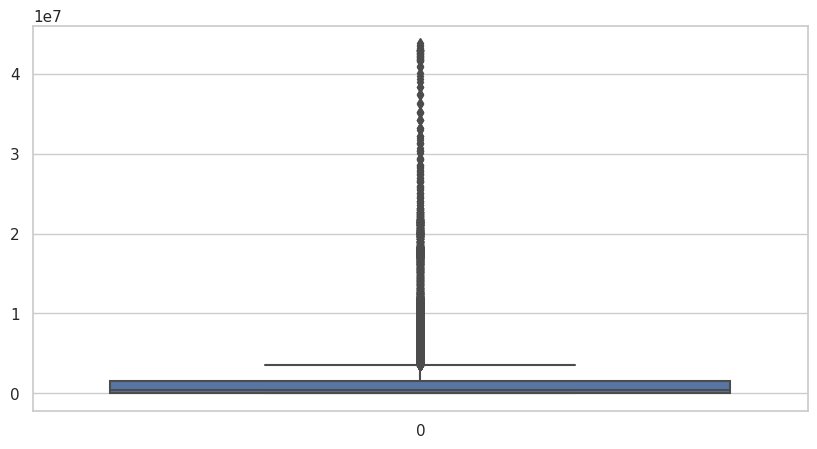

In [42]:
plt.figure(figsize=(10,5))
sns.set(style='whitegrid')
sns.boxplot(data['Population'])
plt.show()

In [43]:
data.head()

Country  Year  Gender          Age  SuicidesNo  Population  \
0  Albania  1987    male  15-24 years          21      312900   
1  Albania  1987    male  35-54 years          16      308000   
2  Albania  1987  female  15-24 years          14      289700   
3  Albania  1987    male    75+ years           1       21800   
4  Albania  1987    male  25-34 years           9      274300   

   Suicides100kPop GdpForYearMoney  GdpPerCapitalMoney       Generation  
0             6.71   2,156,624,900                 796     Generation X  
1             5.19   2,156,624,900                 796           Silent  
2             4.83   2,156,624,900                 796     Generation X  
3             4.59   2,156,624,900                 796  G.I. Generation  
4             3.28   2,156,624,900                 796          Boomers

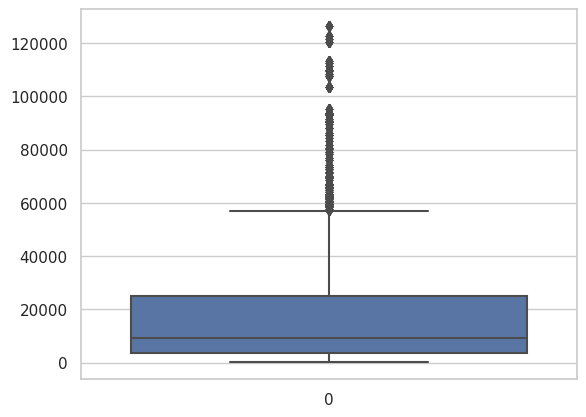

In [44]:
sns.set(style='whitegrid')
sns.boxplot(data['GdpPerCapitalMoney'])
plt.show()

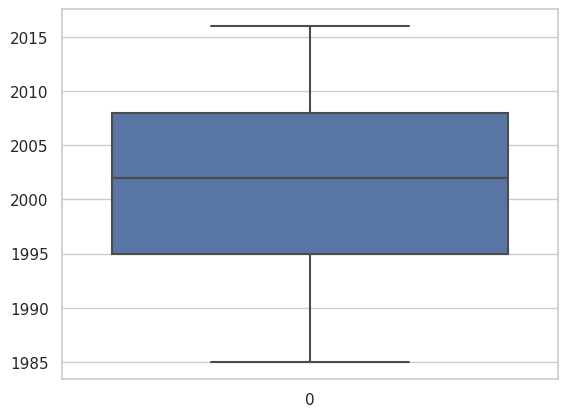

In [45]:
sns.set(style='whitegrid')
sns.boxplot(data.Year)
plt.show()

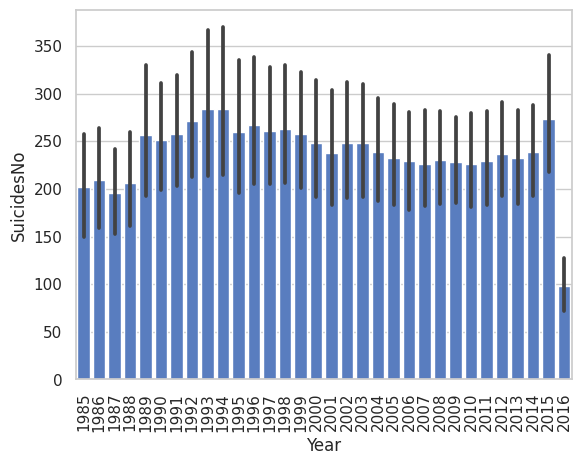

In [46]:
# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="Year", y="SuicidesNo", data=data,
            label="Year Suicides", color="b")
plt.xticks(rotation=90)
plt.show()

<Figure size 700x700 with 0 Axes>

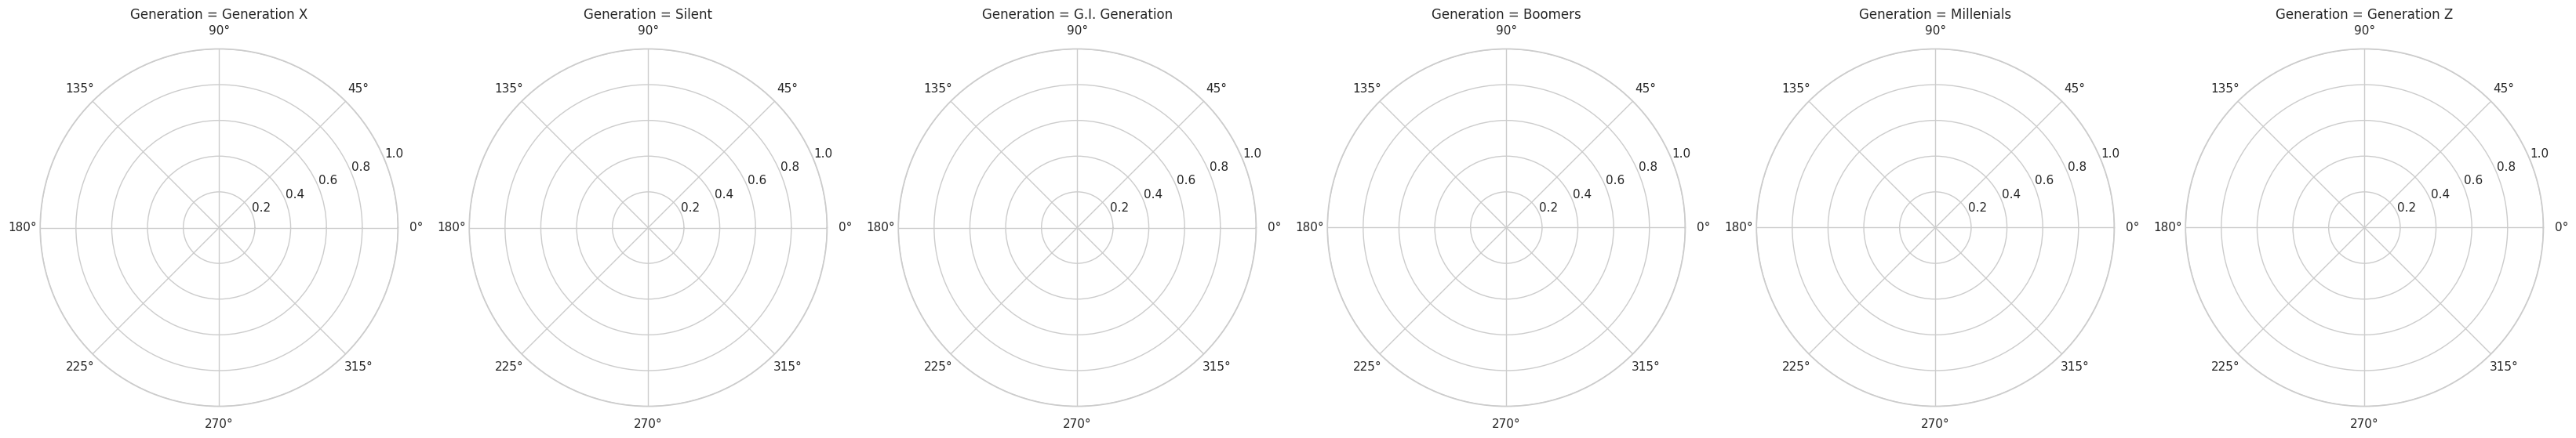

In [47]:

plt.figure(figsize=(7,7))
g = sns.FacetGrid(data, col="Generation", hue="Year",
                  subplot_kws=dict(projection='polar'), height=5.5,
                  sharex=False, sharey=False, despine=False)

plt.show()

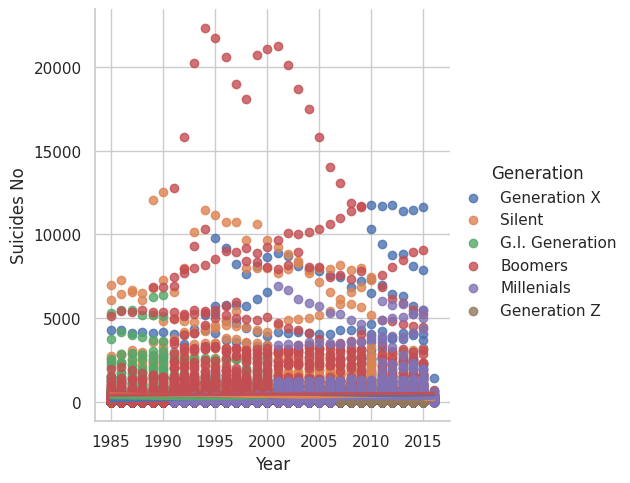

In [48]:
# Plot sepal with as a function of sepal_length across days
g = sns.lmplot(x="Year", y="SuicidesNo", hue="Generation",
               truncate=True, height=5, data=data)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Year", "Suicides No")
plt.show()

In [49]:
data.head()

Country  Year  Gender          Age  SuicidesNo  Population  \
0  Albania  1987    male  15-24 years          21      312900   
1  Albania  1987    male  35-54 years          16      308000   
2  Albania  1987  female  15-24 years          14      289700   
3  Albania  1987    male    75+ years           1       21800   
4  Albania  1987    male  25-34 years           9      274300   

   Suicides100kPop GdpForYearMoney  GdpPerCapitalMoney       Generation  
0             6.71   2,156,624,900                 796     Generation X  
1             5.19   2,156,624,900                 796           Silent  
2             4.83   2,156,624,900                 796     Generation X  
3             4.59   2,156,624,900                 796  G.I. Generation  
4             3.28   2,156,624,900                 796          Boomers

Text(0, 0.5, 'Count')

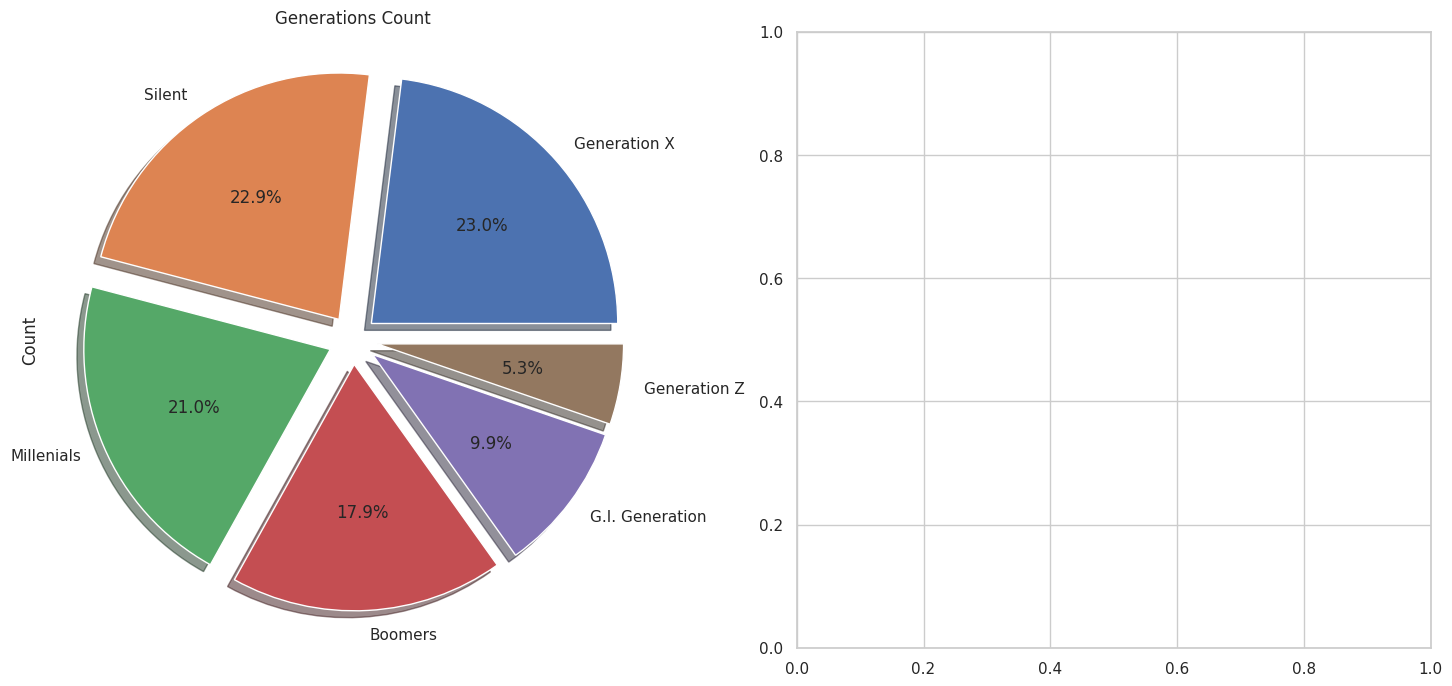

In [50]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Generation'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Generations Count')
ax[0].set_ylabel('Count')


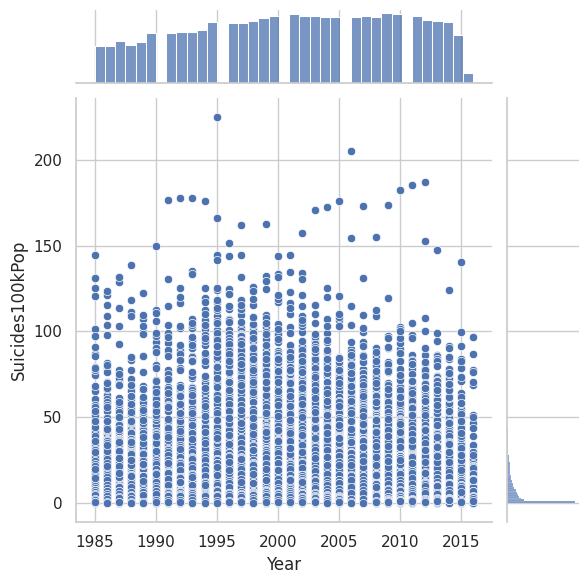

In [51]:
fig=sns.jointplot(y='Suicides100kPop',x='Year',data=data)
plt.show()

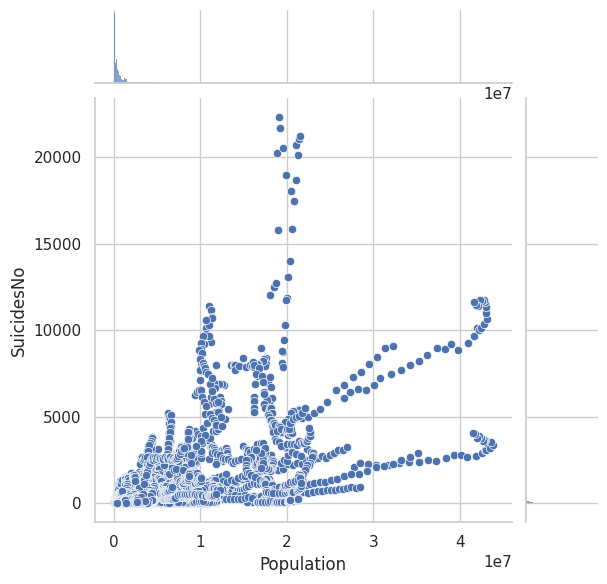

In [52]:
fig=sns.jointplot(y='SuicidesNo',x='Population',data=data)
plt.show()

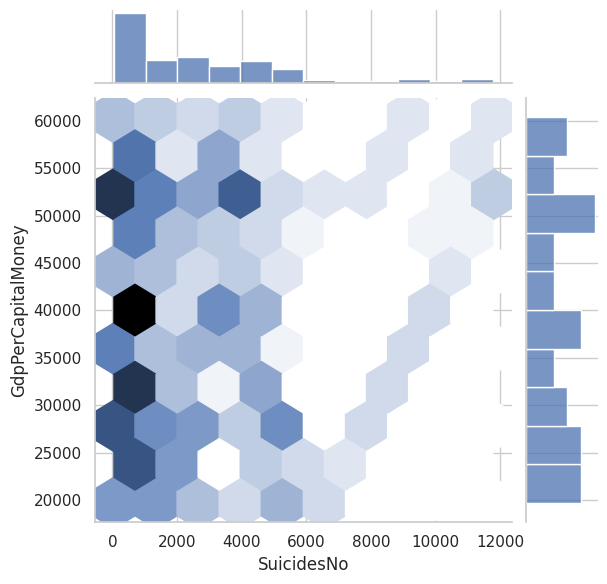

In [53]:
fig=sns.jointplot(y='GdpPerCapitalMoney',x='SuicidesNo',kind='hex',data=data[data['Country']=='United States'])
plt.show()

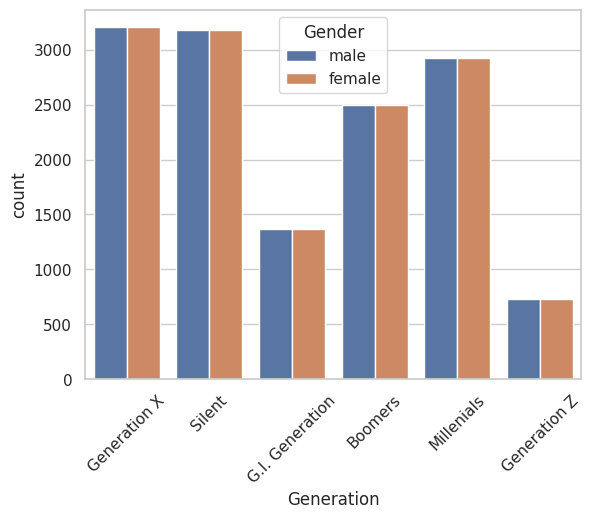

In [54]:
sns.countplot(x="Generation", hue="Gender",
                 data=data)
plt.xticks(rotation=45)
plt.show()

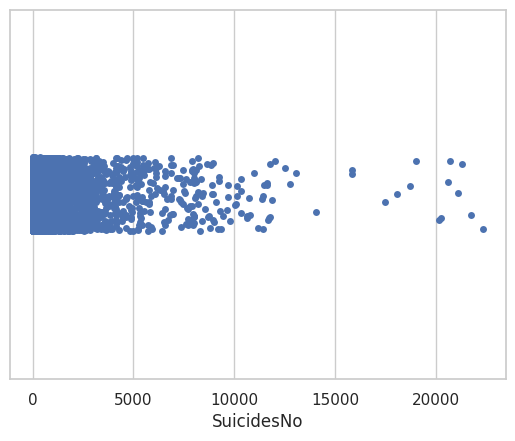

In [55]:
sns.stripplot(x=data['SuicidesNo'])
plt.show()

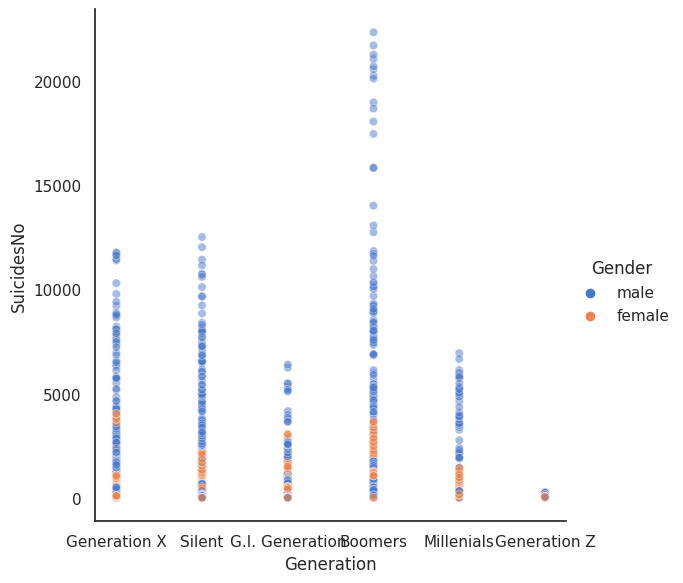

In [56]:
sns.set(style="white")
# Plot miles per gallon against horsepower with other semantics
sns.relplot(x="Generation",y="SuicidesNo",hue="Gender",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)
plt.show()

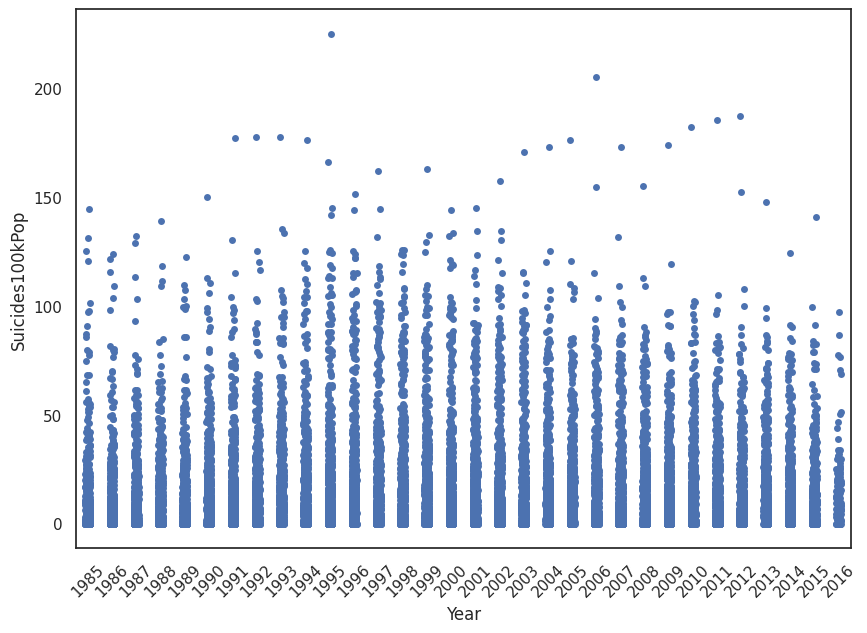

In [57]:
plt.figure(figsize=(10,7))
sns.stripplot(x="Year",y='Suicides100kPop',data=data)
plt.xticks(rotation=45)
plt.show()

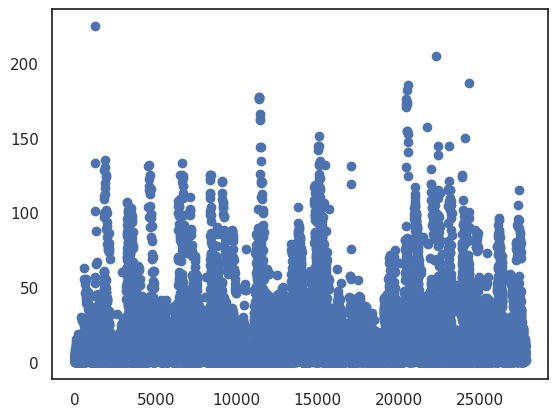

In [58]:
plt.scatter(x=np.arange(1,27821),y=data['Suicides100kPop'].values.tolist())
plt.show()

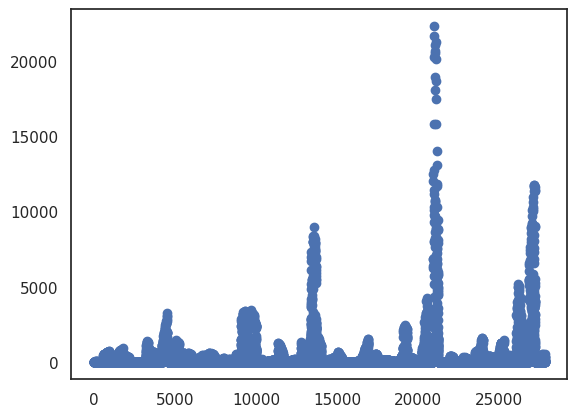

In [59]:
plt.scatter(x=np.arange(1,27821),y=data['SuicidesNo'].values.tolist())
plt.show()

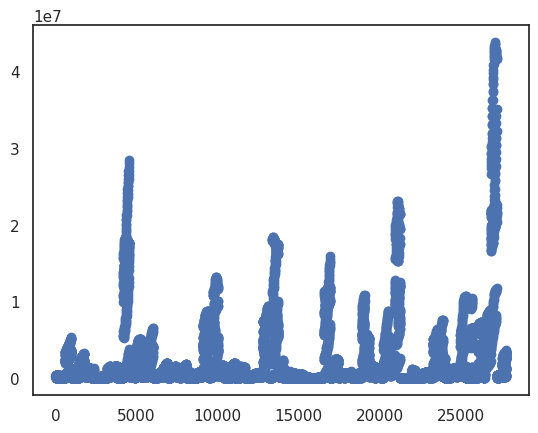

In [60]:
plt.scatter(x=np.arange(1,27821),y=data['Population'].values.tolist())
plt.show()

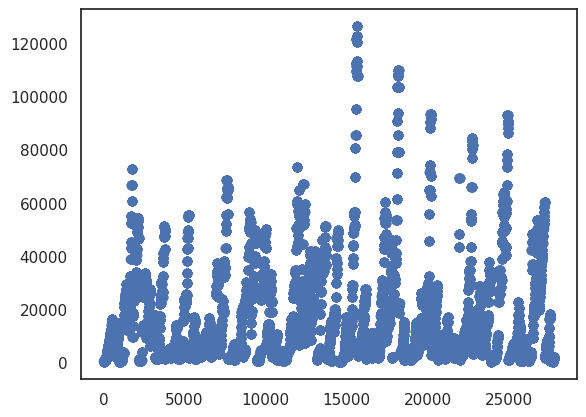

In [61]:
plt.scatter(x=np.arange(1,27821),y=data['GdpPerCapitalMoney'].values.tolist())
plt.show()

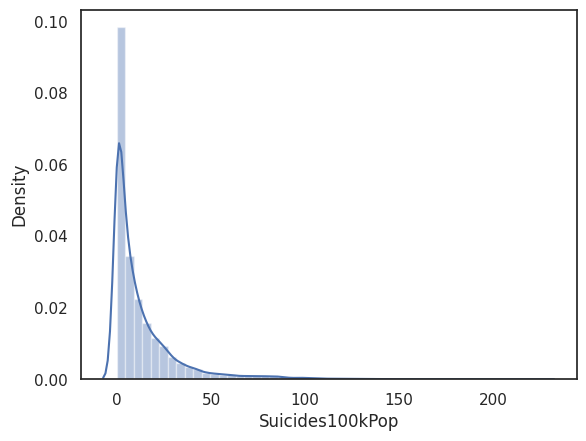

In [62]:
sns.distplot(data['Suicides100kPop'])
plt.show()

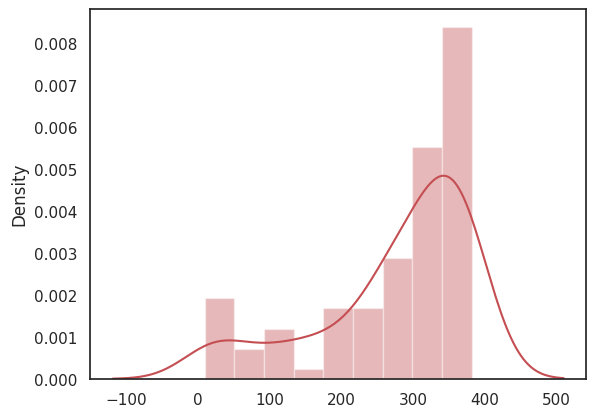

In [63]:
sns.set_color_codes()
sns.distplot(data['Country'].value_counts().values,color='r')
plt.show()

In [64]:
data[(data['Gender']=='male')].Age.value_counts().values

array([2321, 2321, 2321, 2321, 2321, 2305])

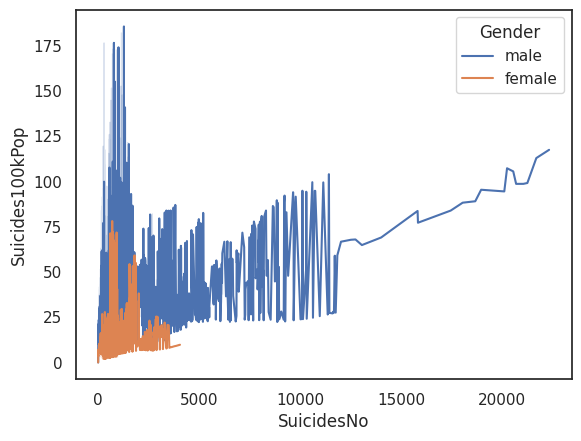

In [65]:
# Plot the responses for different events and regions
sns.lineplot(x="SuicidesNo", y="Suicides100kPop",
             hue="Gender",data=data.sort_values(by='Suicides100kPop',ascending=False))
plt.show()

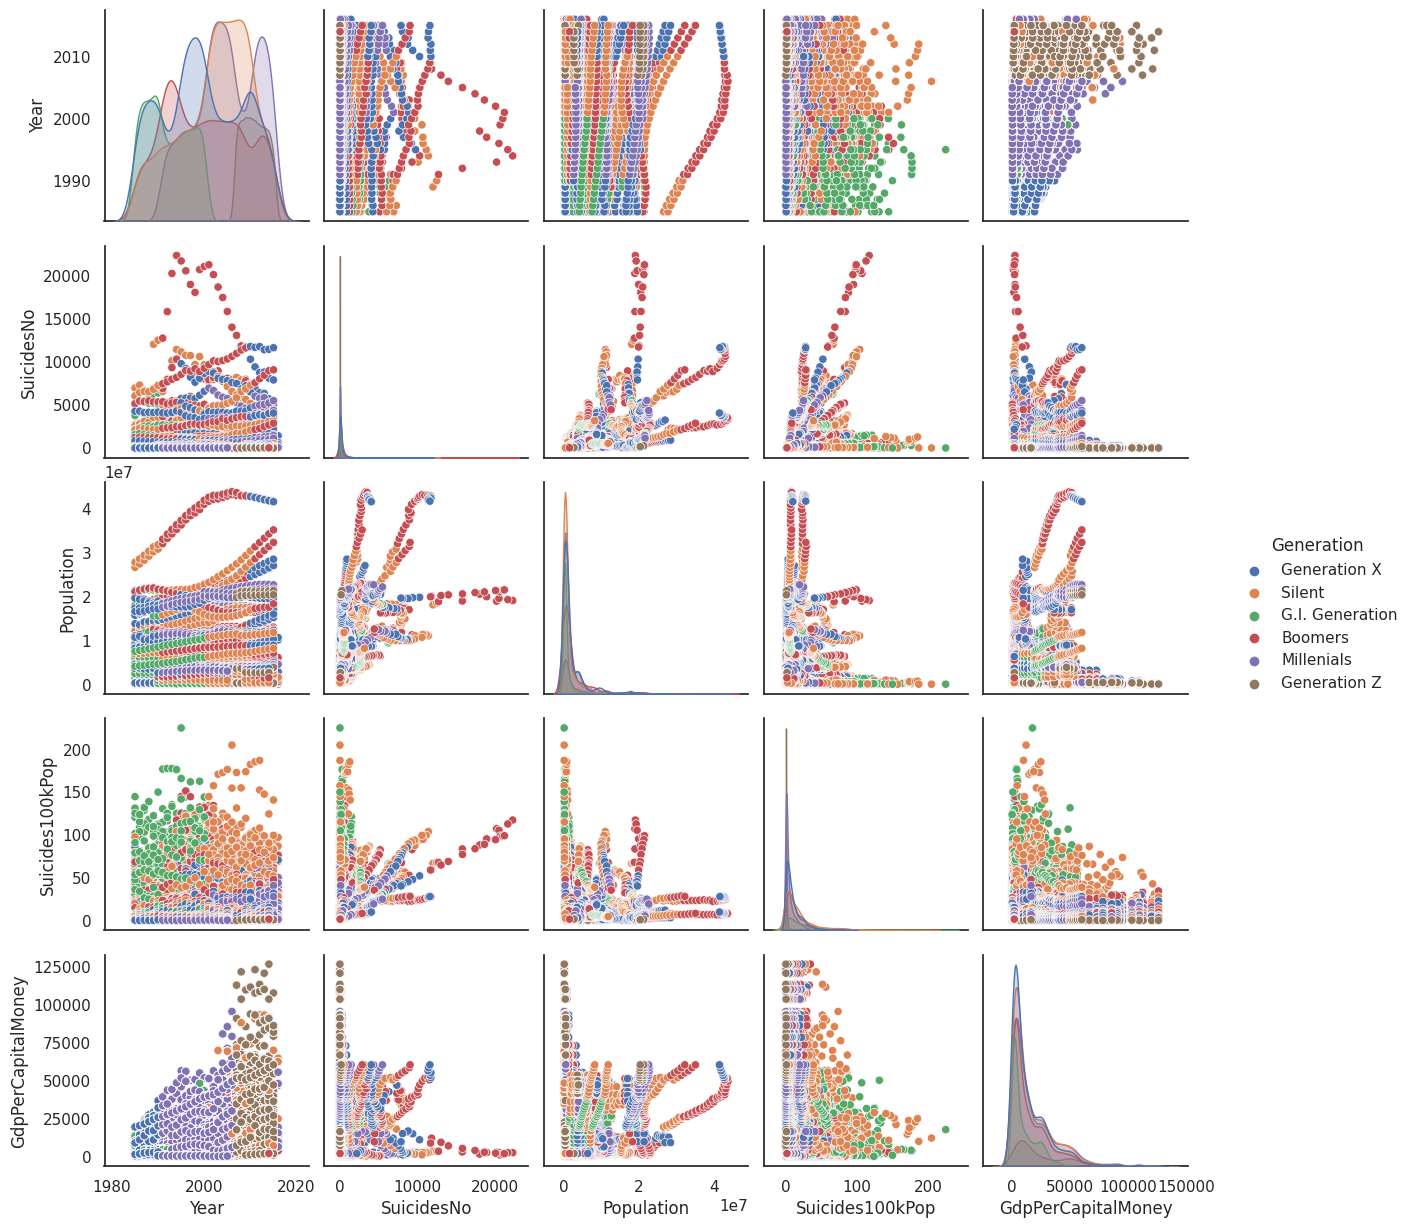

In [66]:
sns.pairplot(data,hue='Generation')
plt.show()

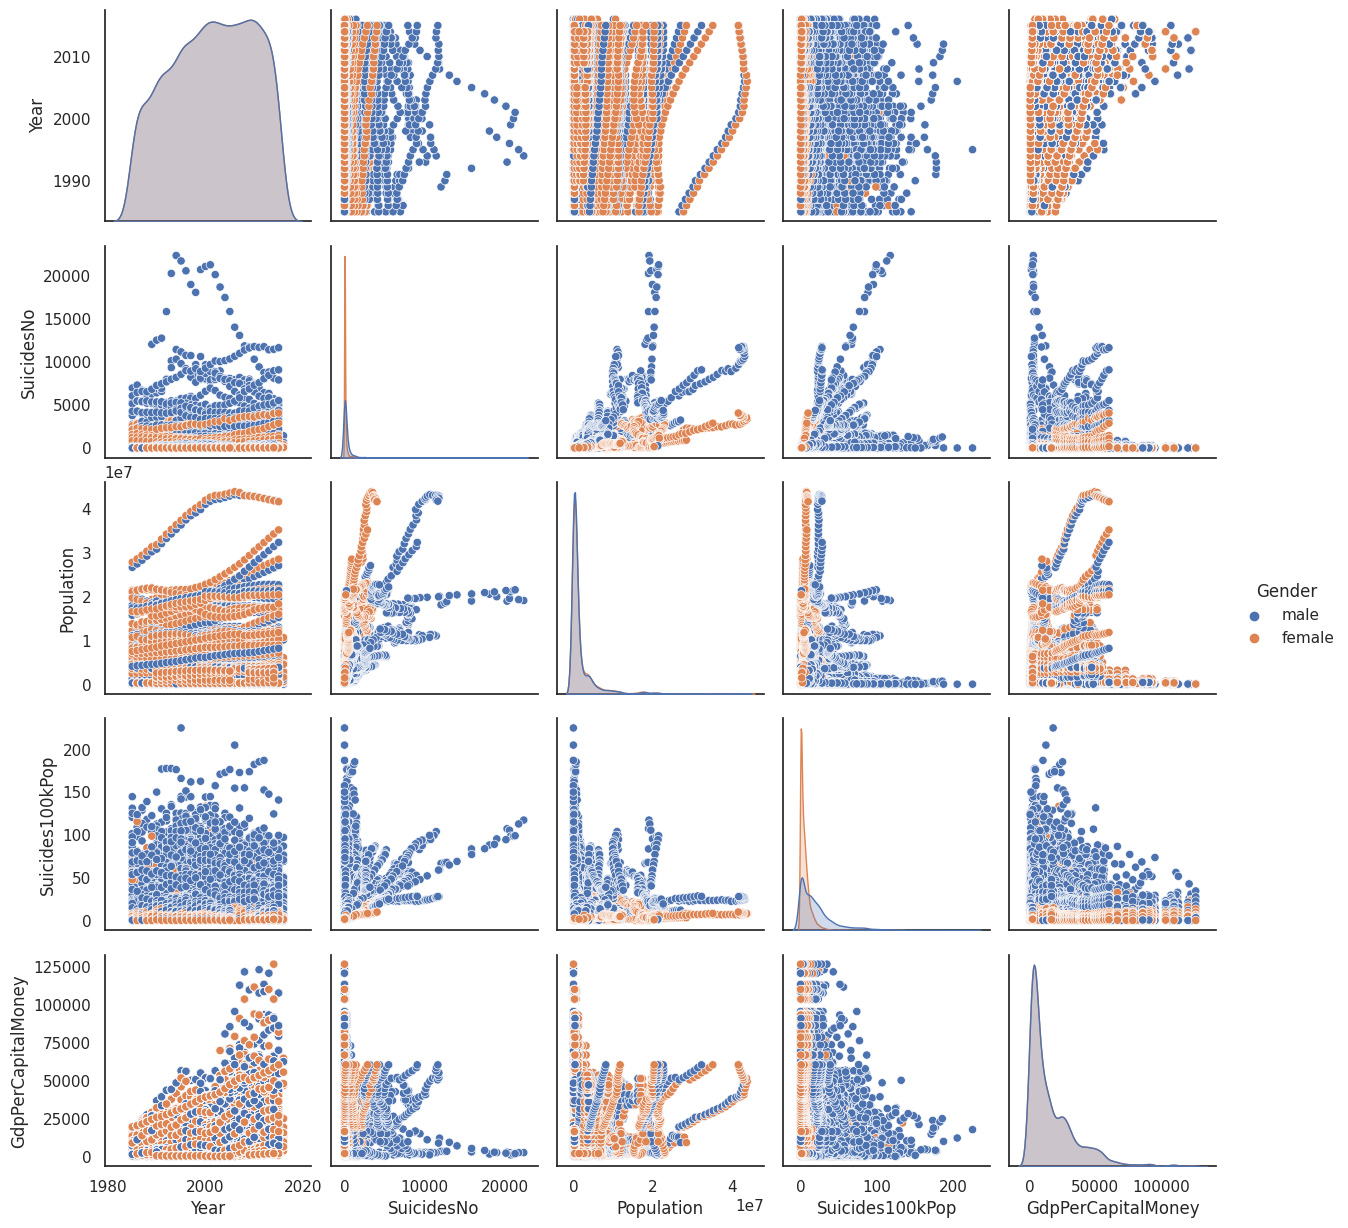

In [67]:
sns.pairplot(data, hue="Gender")
plt.show()

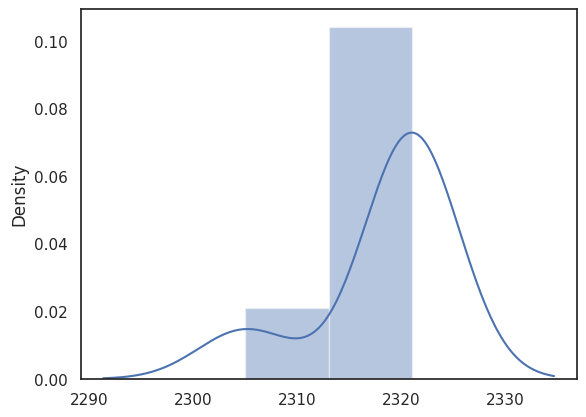

In [68]:
sns.distplot(data[(data['Gender']=='female')].Age.value_counts().values)
plt.show()

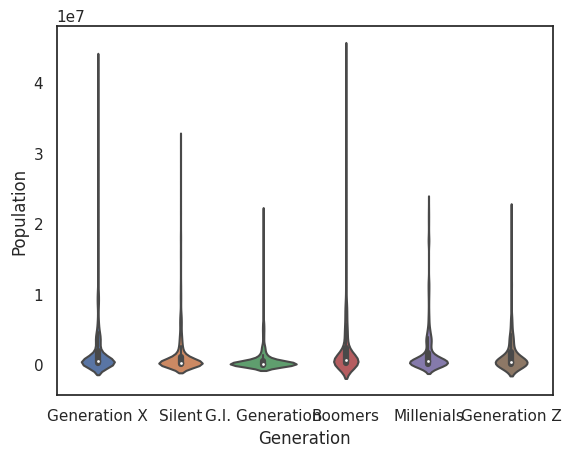

In [69]:
sns.violinplot(x=data['Generation'],y=data['Population'])
plt.show()

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Generation X'),
  Text(1, 0, 'Silent'),
  Text(2, 0, 'G.I. Generation'),
  Text(3, 0, 'Boomers'),
  Text(4, 0, 'Millenials'),
  Text(5, 0, 'Generation Z')])

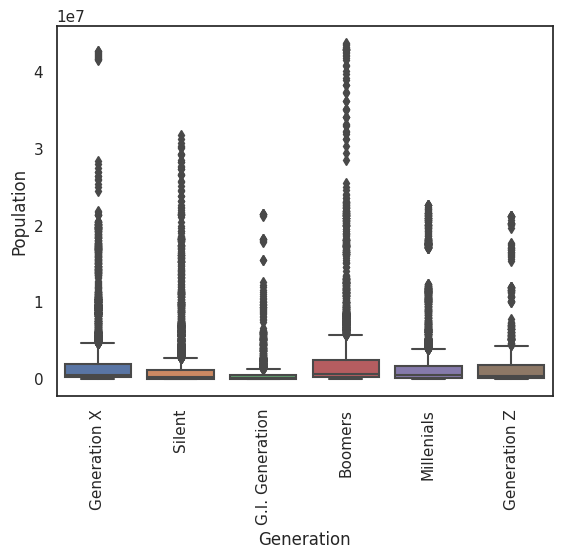

In [70]:
sns.boxplot(x=data['Generation'],y=data['Population'])
plt.xticks(rotation=90)

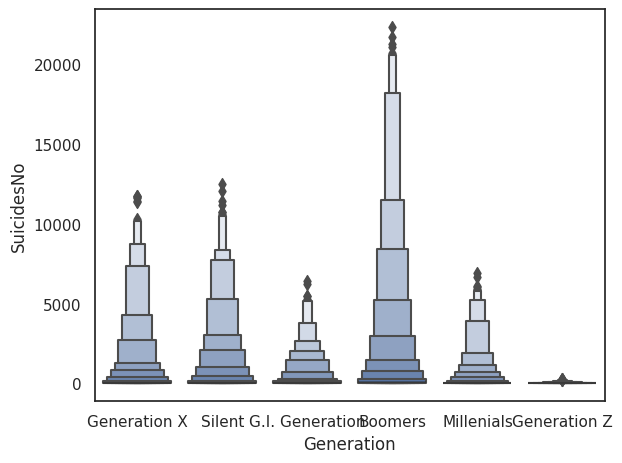

In [71]:
sns.boxenplot(x="Generation", y="SuicidesNo",
              color="b",
              scale="linear", data=data)
plt.tight_layout()
plt.show()

In [72]:
max(data.SuicidesNo)

22338

In [73]:
min(data.SuicidesNo)

0

In [74]:
data[data.SuicidesNo==max(data.SuicidesNo)]

Country  Year Gender          Age  SuicidesNo  Population  \
20996  Russian Federation  1994   male  35-54 years       22338    19044200   

       Suicides100kPop  GdpForYearMoney  GdpPerCapitalMoney Generation  
20996            117.3  395,077,301,248                2853    Boomers

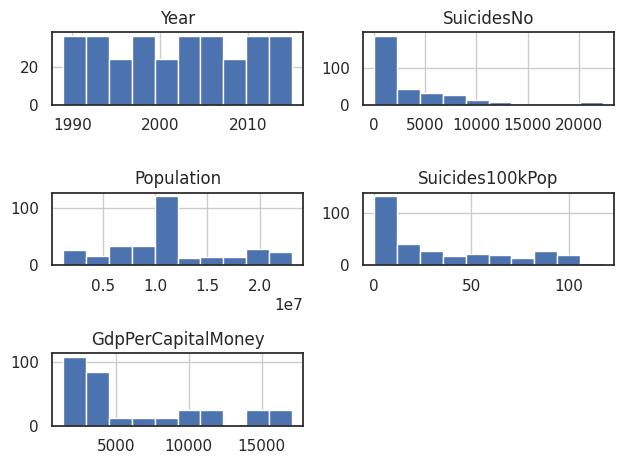

In [75]:
data[data['Country']=='Russian Federation'].hist()
plt.tight_layout()
plt.show()

In [76]:
data[data.SuicidesNo==min(data.SuicidesNo)]

Country  Year  Gender          Age  SuicidesNo  Population  \
9      Albania  1987  female   5-14 years           0      311000   
10     Albania  1987  female  55-74 years           0      144600   
11     Albania  1987    male   5-14 years           0      338200   
22     Albania  1988  female   5-14 years           0      317200   
23     Albania  1988    male   5-14 years           0      345000   
...        ...   ...     ...          ...         ...         ...   
27363  Uruguay  1998  female   5-14 years           0      262973   
27459  Uruguay  2006  female   5-14 years           0      260187   
27471  Uruguay  2007  female   5-14 years           0      257931   
27495  Uruguay  2009    male   5-14 years           0      263516   
27543  Uruguay  2014  female   5-14 years           0      243247   

       Suicides100kPop GdpForYearMoney  GdpPerCapitalMoney       Generation  
9                  0.0   2,156,624,900                 796     Generation X  
10                 0.0   2,156,624,900                 796  G.I. Generation  
11                 0.0   2,156,624,900                 796     Generation X  
22                 0.0   2,126,000,000                 769     Generation X  
23                 0.0   2,126,000,000                 769     Generation X  
...                ...             ...                 ...              ...  
27363              0.0  25,385,928,198                8420       Millenials  
27459              0.0  19,579,457,966                6362       Millenials  
27471              0.0  23,410,572,634                7581     Generation Z  
27495              0.0  31,660,911,277               10166     Generation Z  
27543              0.0  57,236,013,086               18012     Generation Z  

[4281 rows x 10 columns]

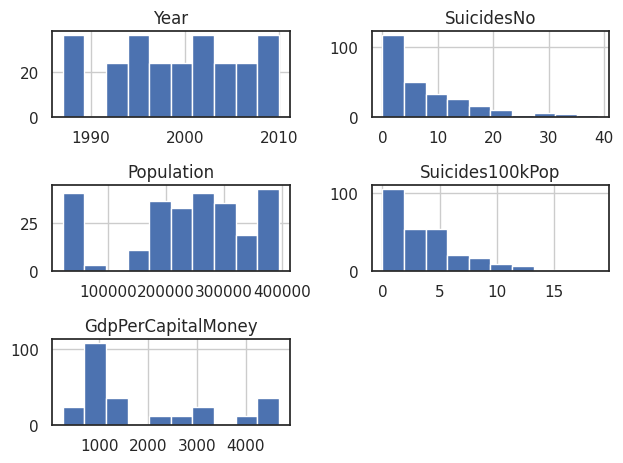

In [77]:
data[data['Country']=='Albania'].hist()
plt.tight_layout()
plt.show()

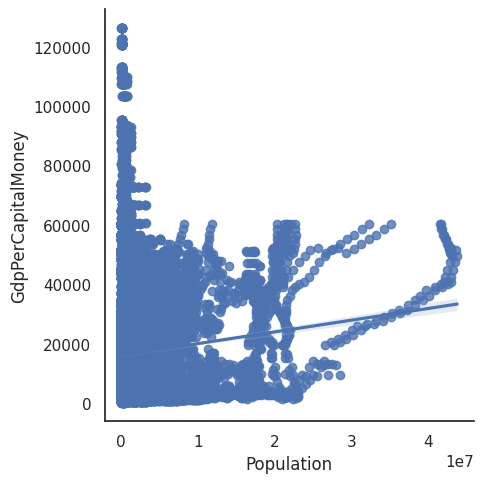

In [78]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="Population", y="GdpPerCapitalMoney", data=data)
plt.show()

In [79]:
sns.set(style="whitegrid")

# Make an example dataset with y ~ x
rs = np.random.RandomState(7)
x = rs.normal(2, 1, 75)
y = 2 + 1.5 * x + rs.normal(0, 2, 75)

# Plot the residuals after fitting a linear model
sns.residplot(x, y, lowess=True, color="g")
plt.show()

TypeError: residplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 2 keyword-only arguments) were given

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.iloc[:,-1]=le.fit_transform(data.iloc[:,-1])

In [ ]:
data.head(2)

In [ ]:
sns.pairplot(data, hue="Generation")
plt.show()